# Image Classification using Logistic Regression and Softmax Regression
### Fashion-MNIST Dataset

## 1. Install Required Libraries
Before starting, you need to install the necessary Python libraries:
- **TensorFlow**: Used for building and training the Softmax Regression model.
- **Scikit-Learn**: Provides the Logistic Regression implementation.
- **Matplotlib**: Used for plotting images and confusion matrices.
```bash
pip install tensorflow scikit-learn matplotlib
```


## 2. Import Necessary Libraries
In this step, we import the necessary libraries to handle data processing, model training, and evaluation.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report


## 3. Load and Preprocess the Fashion-MNIST Dataset
Fashion-MNIST is a dataset of Zalando's article images consisting of 60,000 training images and 10,000 test images, categorized into 10 classes.


In [2]:
# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten images for Logistic Regression
train_images_flattened = train_images.reshape(train_images.shape[0], 28 * 28)
test_images_flattened = test_images.reshape(test_images.shape[0], 28 * 28)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## 4. Logistic Regression for Image Classification
Logistic Regression is used for multi-class classification. We fit the model using the flattened images.

In [5]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model using the training data
logistic_model.fit(train_images_flattened, train_labels)

# Predict the labels for the test set
test_predictions = logistic_model.predict(test_images_flattened)
# Evaluate the model
print("Accuracy:", accuracy_score(test_labels, test_predictions))
print("\nClassification Report:\n", classification_report(test_labels, test_predictions))

Accuracy: 0.8439

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.97      0.96      0.97      1000
           2       0.73      0.73      0.73      1000
           3       0.83      0.87      0.85      1000
           4       0.73      0.76      0.74      1000
           5       0.94      0.93      0.93      1000
           6       0.62      0.57      0.59      1000
           7       0.90      0.94      0.92      1000
           8       0.94      0.94      0.94      1000
           9       0.95      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

## 5. Softmax Regression (Using TensorFlow/Keras)
Softmax Regression is implemented using a simple neural network in TensorFlow/Keras.

In [9]:
# Initialize the Sequential model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(10, activation='softmax'))
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model on the training data
model.fit(train_images, train_labels, epochs=10,batch_size=32, validation_data=(test_images, test_labels))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7370 - loss: 0.7812 - val_accuracy: 0.8218 - val_loss: 0.5085
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8430 - loss: 0.4646 - val_accuracy: 0.8320 - val_loss: 0.4869
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8507 - loss: 0.4365 - val_accuracy: 0.8308 - val_loss: 0.4771
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8536 - loss: 0.4229 - val_accuracy: 0.8424 - val_loss: 0.4516
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8579 - loss: 0.4097 - val_accuracy: 0.8414 - val_loss: 0.4514
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8597 - loss: 0.4080 - val_accuracy: 0.8387 - val_loss: 0.4586
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8633 - loss: 0.3996 - val_accuracy: 0.8366 - val_loss: 0.4640
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8612 - loss: 0.4024 - 

In [10]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8475 - loss: 0.4389
Test Accuracy: 0.8447


## 6. Visualize Model Predictions
We visualize the predictions made by the Softmax Regression model on the test dataset.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


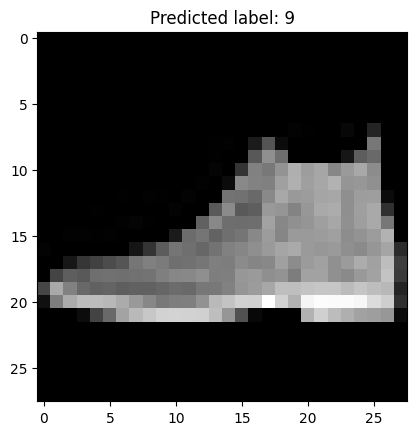

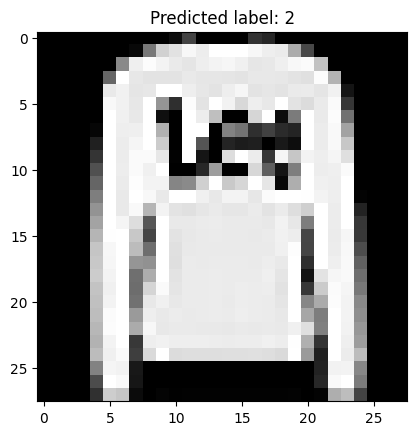

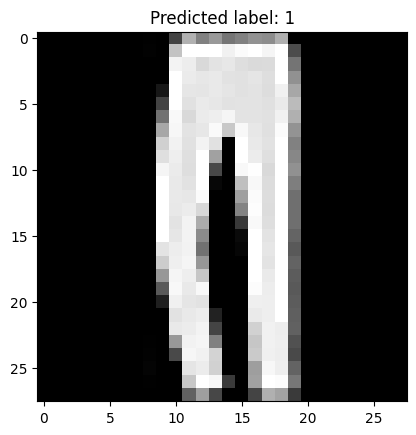

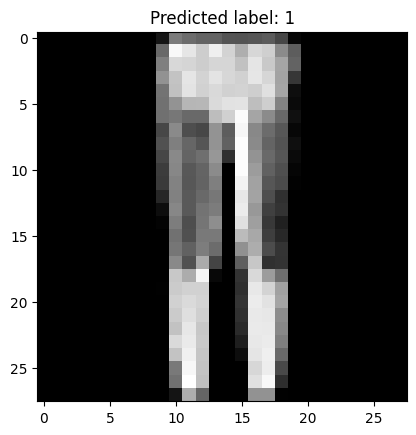

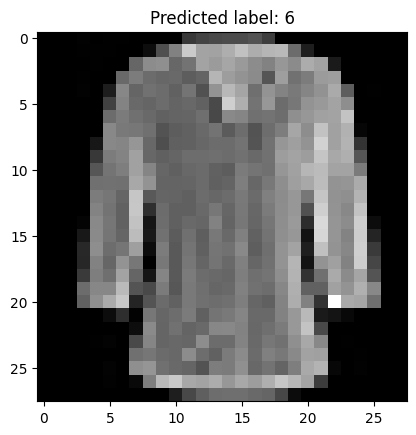

In [11]:
predictions = model.predict(test_images)


for i in range(5):
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f'Predicted label: {np.argmax(predictions[i])}')
    plt.show()

### Summary
- **Logistic Regression**: You flattened the images and used `LogisticRegression` from Scikit-Learn to classify the Fashion-MNIST dataset.
- **Softmax Regression**: You used TensorFlow/Keras to build a simple neural network with a softmax activation function to classify the same dataset.